# Simulating coupled Classical Harmonic oscillators using Classiq
___

**Authors**: Viraj Dsouza, Cristina Radian, Kerem Yurtseven

**Date**: 09.08.2024

This work is designed under and for the final project of the Womanium Quantum+AI Program 2024

**Main Reference**: Exponential Quantum Speedup in Simulating Coupled Classical Oscillators, Babbush et.al, 2023 [1](https://arxiv.org/abs/2303.13012)
___

## Theoretical Background:


We are trying to find a solution for a system of classical coupled harmonic oscillators with $N=2^n$ masses. Let $\vec{x}$ be the displacement vector
$$
    \vec{x} = \left(x_1(t),.....,x_N(t) \right)^T \in \mathbb{R}^N
    \qquad (1)
$$
So, for the system of $N$ masses connected by springs, Newton's equation becomes
$$
    m_j \ddot{x}_j(t) = \sum_{k \neq j} \kappa_{jk} \left( x_k(t) - x_j(t) \right) - \kappa_{jj} x_j(t) \qquad (2)
$$
where $j \in [N] := \{1,...,N\}$ and $\kappa_{jk}$ is the spring constant of the spring connecting the $j ^{th}$ and the $k ^{th}$ masses.

Representing Newton's Equation in matrix form:
$$
    \mathbf{M}\ddot{\vec{x}}(t) = - \mathbf{F}\vec{x}(t)
    \qquad (3)
$$
where $\mathbf{M}$ is the $N\times N$ diagonal matrix with entries $m_j > 0$ and $\mathbf{F}$ is an $N\times N$ matrix with $f_{jj}=\sum_k \kappa_{jk}$ and $f_{jk} = -\kappa_{jk}$.

___



In order to reduce Newton's Equation to a Quantum Evolution, we perform a change of variable where $\vec{y}(t) := \sqrt{\mathbf{M}}\vec{x}(t)$. Equation $(3)$ becomes:
$$
    \ddot{\vec{y}}(t) = -\mathbf{A}\vec{y}(t)
    \qquad (4)
$$
where $\mathbf{A} := \sqrt{\mathbf{M}}^{-1}\mathbf{F}\sqrt{\mathbf{M}}^{-1}$. Convert equation (4) into a similar form of Schrödinger's Equation by adding $i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)$ on both sides of equation $4$,
$$
    \ddot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)=i\sqrt{\mathbf{A}}\left(\dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t)\right)
    \qquad (5)
$$
Solution to (5) is
$$
    \dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t) = e^{it\sqrt{\mathbf{A}}}\left(\dot{\vec{y}}(0) + i\sqrt{\mathbf{A}}\vec{y}(0)\right)
    \qquad (6)
$$

___

In order to access $\sqrt{\mathbf{A}}$, define $\mathbf{B}\mathbf{B^\dagger} = \mathbf{A}$ where B is $N\times M$ and $M = N\times (N+1) /2$. However, to simulate the Hamiltonian using qubits, we need it to be a square matrix of dimension $2^{q}$ where $q$ is the number of qubits simulating $H$. To achieve this, we  pad $B$ with zeros to make its dimension $N^2\times N^2$, so that $H$ becomes a $2N^{2}X2N^{2}$ matrix which can be simulated with $q=2n+1$ qubits, where $N=2^{n}$. So, the hamiltonian after padding becomes
$$
    \mathbf{H} := -\begin{pmatrix}
\mathbf{0}{_{N^{2}XN^{2}}} & \mathbf{B}{_{N^{2}XN^{2}}}\\
\mathbf{B^\dagger}{_{N^{2}XN^{2}}} & \mathbf{0}{_{N^{2}XN^{2}}}
\end{pmatrix}_{2N^{2}X2N^{2}}
\qquad (7)
$$
(5) can be stated as:
$$
    |{\dot{\psi}(t)}\rangle = -i\mathbf{H} |{\psi(t)}\rangle
    \qquad (8)
$$
where
$$
    |{\psi(t)}\rangle \propto \begin{pmatrix}
\dot{\vec{y}}(t)\\
i\mathbf{B^\dagger}\vec{y}(t)
\end{pmatrix}
\qquad (9)
$$
is an appropriate solution to equation $(8)$

Here $\mathbf{A}$ is positive-semi definite and Hermitian by definition, Cholesky decomposition cannot be used to find $\mathbf{B}$ always since it requires $A$ to be positive definite. A method to find $\mathbf{B}$ is given by the paper
$$
    \sqrt{\mathbf{M}}\mathbf{B}|{j,k}\rangle=
    \begin{cases}
        \sqrt{\kappa_{jj}} & \text{if } j = k\\
        \sqrt{\kappa_{jk}}\left(|{j}\rangle-|{k}\rangle \right) & \text{if } j < k
    \end{cases}
    \qquad (10)
$$
where $|{j,k}\rangle$ is the bra-ket notation for the basis of complex space $\mathbb{C}^{M}$ over $\mathbb{C}$ and $j \leq k \in [N]$.
___

<!-- ##### A brief background on vector spaces:

Here is a crucial point for the difference between basis over $\mathbb{C}$ and basis over $\mathbb{R}$. If basis are given over $\mathbb{C}$, they are the complex combinations of the bases and if bases are given over $\mathbb{R}$, they are the real combinations of the basis vectors. To illustrate, let us take the bases of $\mathbb{C}^2$ and $\gamma \in \mathbb{C}^2$.
$$
    \vec{\gamma} = a_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + a_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix} + a_3\begin{pmatrix}
            i\\
            0
            \end{pmatrix} + a_4\begin{pmatrix}
            0\\
            i
            \end{pmatrix}
    \qquad (11)
$$
(11) is the span for $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{R}$ and $a_i \in \mathbb{R}$.
$$
    \vec{\gamma} = c_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + c_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix}
    \qquad (12)
$$
(12) is the span for  $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{C}$ and $c_i \in \mathbb{C}$. -->


As an example, consider two unit masses $m_1$ and $m_2$, also let $k_{11}=k_{22}=0$ and $k_{12}=k_{21}=1$

In order to create $\mathbf{B}$, use (10).

For $k=j=1$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,1}\rangle = \sqrt{\kappa_{11}}|{1}\rangle

$$

$$
\mathbf{B}|{1,1}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B}\begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (15)
$$

For $k=1$ and $j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,2}\rangle = \sqrt{\kappa_{12}}\left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B}|{1,2}\rangle = \left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} - \begin{pmatrix}
    0 \\
    1
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    -1
\end{pmatrix} \qquad (16)
$$

For $k=j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{2,2}\rangle = \sqrt{\kappa_{22}}|{2} \rangle 
$$

$$
\mathbf{B}|{2,2}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (17)
$$
Combining $(15), (16), (17)$
$$
\mathbf{B}\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} 
$$

$$
\mathbf{B} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \qquad (18)
$$

Lastly, show that $\mathbf{B}\mathbf{B}^\dagger = \mathbf{A}$
$$
\begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \begin{pmatrix}
    0 & 0 \\
    1 & -1 \\
    0 & 0
\end{pmatrix} = \begin{pmatrix}
    1 & -1 \\
    -1 & 1
\end{pmatrix} \qquad (19)
$$
That ends the constitution of $\mathbf{B}$ for this example.

Following equation $(7)$ the Hamiltonian ($H$) for this case becomes
$$
\mathbf{H} = \begin{pmatrix}
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} \qquad (20)
$$

___

We can also use the following methodology (for the simplest case) to obtain $B$ from $A$.

For a square and **normal** matrix $A$ we have the eigen value decomposition as follows: 

$$
A = V \Lambda V^T
$$

where:
    $V$ is the matrix of eigenvectors of $A$.
    $\Lambda$ is the diagonal matrix of eigenvalues of $A$.


Next, we construct the diagonal matrix $\sqrt{\Lambda}$ containing the square roots of the eigenvalues:

$$
\sqrt{\Lambda} = \text{diag}(\sqrt{\lambda_1}, \sqrt{\lambda_2}, \ldots, \sqrt{\lambda_n})
$$

We then define the matrix $B$ as follows:

$$B = V \sqrt{\Lambda}$$


Its easy to verify that $A$ can be reconstructed from $B$ as $ A= BB^T$

___


### 1.  Simulating the simplest possible case: (Toy Example 1: $m_1=m_2=1$, $k_{11}=k_{22}=0$, $k_{12}=k_{21}=1$)

In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import typing
import itertools
import scipy
import classiq
from classiq import *
from classiq.execution import ExecutionPreferences, ClassiqBackendPreferences, ClassiqSimulatorBackendNames, ExecutionSession
from typing import cast
from qutip import qeye, sigmax, sigmay, sigmaz
from itertools import product
from numpy import kron
from scipy.special import eval_chebyt, jv
from classiq.qmod.symbolic import pi
from ccho_helpers import *

## Defining all Global Variables
PAULI_DICT = {
    "I": np.array([[1, 0], [0, 1]], dtype=np.complex128),
    "Z": np.array([[1, 0], [0, -1]], dtype=np.complex128),
    "X": np.array([[0, 1], [1, 0]], dtype=np.complex128),
    "Y": np.array([[0, -1j], [1j, 0]], dtype=np.complex128),
}

CHAR_TO_STUCT_DICT = {"I": Pauli.I, "X": Pauli.X, "Y": Pauli.Y, "Z": Pauli.Z}

### Function Declarations for Pre-processing classical inputs for loading as quantum inputs:

In [2]:
def is_power_of_2(n):
    """Check if a number is a power of 2."""
    return (n & (n - 1) == 0) and n != 0

def initialize_system():
    while True:
        N = int(input("Enter the number of masses (N): "))
        if is_power_of_2(N):
            break
        else:
            print("Error: N must be a power of 2. Please try again.")

    # Initialize the mass matrix (M) and spring constant matrix (K)
    M = np.zeros((N, N))
    K = np.zeros((N, N))

    # Input the values of the masses
    for i in range(N):
        M[i, i] = float(input(f"Enter the mass m_{i+1}: "))

    # Input the spring constants
    for i in range(N):
        for j in range(i, N):
            k = float(input(f"Enter the spring constant k_{i+1}{j+1}: "))
            K[i, j] = k
            K[j, i] = k  # Since K is a symmetric matrix

    # Input the initial position vector (x_0)
    x_0 = np.zeros((N, 1))
    for i in range(N):
        x_0[i, 0] = float(input(f"Enter the initial position x_0_{i+1}: "))

    # Input the initial velocity vector (xdot_0)
    xdot_0 = np.zeros((N, 1))
    for i in range(N):
        xdot_0[i, 0] = float(input(f"Enter the initial velocity xdot_0_{i+1}: "))

    return N, M, K, x_0, xdot_0


#### Pre-Processing of simple case $1$ for quantum evolution:

- Create B Matrix, Hamiltonian and initial state

In [3]:
N, M, K, x_0, xdot_0 = initialize_system() # plug N=2 for 2 case system , we take  $m_1=m_2=1$, $k_{11}=k_{22}=0$, $k_{12}=k_{21}=1, x_0=[0,1], xdot_0=[0,0]

# F Matrix
F= create_matrix_F(K, N)

# A Matrix
A = create_matrix_A(M, F)

# Transform coordinates
y = coordinate_transformation(M, x_0, xdot_0)
y_0 = y["y_0"]
ydot_0 = y["ydot_0"]

# B Matrix
B = create_matrix_B(M, K, A, N)

# Stacking B with zeros to get square matrix N^2 x N^2
B_padded = padding_B(B, N)

# Hamiltonian
Ham = create_Hamiltonian(B_padded)

# Initial State
init_state = create_init_state(B_padded, y_0, ydot_0, N)
E0_y = calculate_energy(y_0, ydot_0, M, K)

# Normalize the Initial State
normalization = normalize_init_state(init_state)
normalized_init_state = normalization["normalized_init_state"]
norm = normalization["norm"]

# Print the results

print("Number of masses", N)
print("Mass matrix", M)
print("Spring Constant Matrix", K)
print("Initial Energy: ", E0_y)
print("B matrix: ", B_padded)
print("Hamiltonian formed:", Ham)
print("Initial State:", init_state)

assert np.matmul(B, B.conj().T).all()==A.all()

Number of masses 2
Mass matrix [[1. 0.]
 [0. 1.]]
Spring Constant Matrix [[0. 1.]
 [1. 0.]]
Initial Energy:  0.5
B matrix:  [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]
Hamiltonian formed: [[-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-1.+0.j  1.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]]
Initial State: [[ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [-0.-1.j]
 [ 0.+0.j]
 [ 0.+0.j]]


In [4]:
np.transpose(Ham)==Ham    # H is hermitian (and all entries are real), this ensures we can use qubitization and product formula based simulations

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

#### Finding the Pauli decomposition of the Hamiltonian formed above:

(Below functions for Pauli Decomposition is taken from [Classiq Library](https://github.com/Classiq/classiq-library/blob/main/algorithms/hhl/hhl/hhl.ipynb), thanks a lot to the authors!). The function are defined in the file ccho_helpers.py. This method as we saw, works fairly well for smaller Hamiltonians. 

In [5]:
# Create the Pauli Matrix Decomposition of the Hamiltonian
pauli_list = lcu_naive(Ham)

# Transform Pauli Matrix Decomposition to Classiq compatible
classiq_pauli_list = pauli_list_to_hamiltonian(pauli_list)

print(pauli_list)

100%|██████████| 64/64 [00:00<00:00, 29684.34it/s]

[('XII', (0.25+0j)), ('XIZ', (-0.25+0j)), ('XIX', (-0.25+0j)), ('XZI', (0.25+0j)), ('XZZ', (-0.25+0j)), ('XZX', (-0.25+0j)), ('YIY', (0.25+0j)), ('YZY', (0.25+0j))]


In [6]:
### Optional (verification purpose)

# check if the decomposition is correct, we use qutip for this

# Define the Pauli matrices and the identity matrix
pauli_operators = {
    'I': qt.qeye(2),
    'X': qt.sigmax(),
    'Y': qt.sigmay(),
    'Z': qt.sigmaz()
}

def create_hamiltonian(hamiltonian_list):
    hamiltonian = 0
    num_qubits = len(hamiltonian_list[0][0])  

    for term in hamiltonian_list:
        pauli_string, coefficient = term
        
        # calculating tensor products
        term_operator = pauli_operators[pauli_string[0]]
        
        
        for pauli in pauli_string[1:]:
            term_operator = qt.tensor(term_operator, pauli_operators[pauli])
        
        # Adding the terms of the Hamiltonian
        hamiltonian += coefficient * term_operator

    return hamiltonian

hamiltonian = create_hamiltonian(pauli_list)

print(hamiltonian)



Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


Thus as we see, the decomposition is exact.

### Hamiltonian simulation

We use the `suzuki_trotter` function of classiq that produces a quantum gate that approximates $e^{iHt}$, for any input **Hermitian operator** $H$ . Since the Hamiltonian for this algorithm is Hermitian by definition, this can be used straightforwardly. The Classiq engine automatically generates an efficient Trotter-Suzuki quantum program that minimizes the functional error. 

Also for this case, we use `order=2` and `repetitions= 20`, although for the most simple case (N=2) order =1 gives fairly good results. For plotting and observing the dynamics, we evolve the Hamiltonian from $t = 0$ to $t = 5$, at intervals of $0.1$. 

In [10]:
### Define function for Quantum Algorithm

@qfunc
def init_phase(state: QNum):
    """
        Definition:
            Imply pi/2 phase to the last half (msb qubit) of the QNum state in order to add -i factor
        Args:
            state (QNum): Initial state with bare amplitudes
        Outputs:
            state (QNum): Initial state with phase
    """

    state_in_qubit = QArray("state_in_qubit")
    msb = QArray("msb", QBit)
    
    size = np.log2(init_state.size)
    allocate(size, msb)

    bind(state, state_in_qubit)
    repeat(state_in_qubit.len, lambda i: CX(state_in_qubit[i], msb[i]))
    control(msb[size-1], lambda: PHASE(np.pi/2, state_in_qubit[size-1]))   # we add a phase of i to the second half of amplitiudes of our qubit state
    bind(state_in_qubit, state)




@qfunc
def main(time: CReal, state: Output[QNum]):
    """
        Definition:
            Main function to make evolution

        Outputs:
            state (Output[QNum]): Resulting state at the time = evolution_coefficient
    """
        
    prepare_amplitudes(amplitudes=list(normalized_init_state), out=state, bound=0.000000000001)
    init_phase(state)
    suzuki_trotter(
        classiq_pauli_list,
        evolution_coefficient=time,
        order=2,
        repetitions=20,
        qbv=state,
    )

model = create_model(main)


The final quantum state from quantum evolution [[ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [-0.74309937-0.66918109j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
Positions at t={i} [[0.16540945+0.37154968j]
 [0.83459054-0.37154968j]]
Velocities at t={i} [[0.+0.j]
 [0.+0.j]]
The final quantum state from quantum evolution [[ 0.10168695+0.j        ]
 [-0.10168703+0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        -0.98960574j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
Positions at t={i} [[0.00519713+0.j]
 [0.99480286+0.j]]
Velocities at t={i} [[ 0.10168695+0.j]
 [-0.10168703+0.j]]
The final quantum state from quantum evolution [[ 0.20125953+0.j        ]
 [-0.20126019+0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        -0.95863911j]
 [ 0.        +0.j        ]
 [ 0.   

/Users/virajdsouza/PEDIA/quantum-annealing/.conda/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/virajdsouza/PEDIA/quantum-annealing/.conda/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/vw/4v920b6d5vv0xtxg3kcw0f0h0000gn/T/ipykernel_13601/2735034719.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/var/folders/vw/4v920b6d5vv0xtxg3kcw0f0h0000gn/T/ipykernel_13601/2735034719.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/var/folders/vw/4v920b6d5vv0xtxg3k

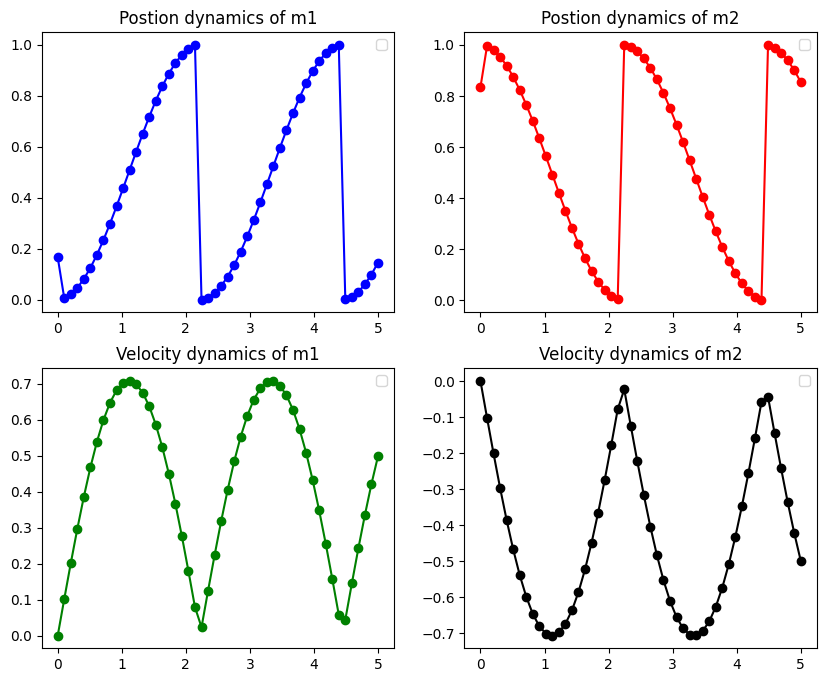

In [11]:
# Execute the Quantum Algorithm with state vector simulation since phase is important


Execution_Prefs = ExecutionPreferences(
    num_shots=1,
    backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ),
)

total_time= 5
steps= 50

# Initialize lists to store the data points
x_vals = []
y1_vals, y2_vals, y3_vals, y4_vals = [], [], [], []

# Synthesizing the quantum program
qprog = synthesize(model)
es = ExecutionSession(qprog, execution_preferences=Execution_Prefs)

# Loop over the time steps
for idx, i in enumerate(np.linspace(0, total_time, steps)):
    result = es.sample({"time": i})
    parsed_state_vector = result.parsed_state_vector
    
    state_amplitudes = sum_amplitudes_by_state(parsed_state_vector, N)
    
    # Normalize the final state
    normalized_final_state = normalize_final_state(state_amplitudes, parsed_state_vector)

    # Simplify the final state by neglecting small terms
    simplified_final_state = simplify_final_state(normalized_final_state)

    # Correct the normalization factor and transform the row vector to column vector
    final_state = norm * simplified_final_state[..., None]
    print("The final quantum state from quantum evolution", final_state)

    # Get the final position and velocity vectors
    final_results = post_process_final_state(final_state, B_padded, N, y_0)
    y_final = final_results["y_final"]
    ydot_final = final_results["ydot_final"]

    # Transform to original coordinates
    x_final_results = back_coordinate_transformation(M, y_final, ydot_final)
    x_final = x_final_results["x_final"]
    xdot_final = x_final_results["xdot_final"]

    print("Positions at t={i}", x_final)
    print("Velocities at t={i}", xdot_final)

    # Append the values to the respective lists
    y1_vals.append(x_final[0, 0])
    y2_vals.append(x_final[1, 0])
    y3_vals.append(xdot_final[0, 0])
    y4_vals.append(xdot_final[1, 0])

    x_vals.append(i)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].set_title("Position dynamics of m1")
axs[0, 1].set_title("Position dynamics of m2")
axs[1, 0].set_title("Velocity dynamics of m1")
axs[1, 1].set_title("Velocity dynamics of m2")

axs[0, 0].plot(x_vals, y1_vals, 'b-o')
axs[0, 1].plot(x_vals, y2_vals, 'r-o')
axs[1, 0].plot(x_vals, y3_vals, 'g-o')
axs[1, 1].plot(x_vals, y4_vals, 'k-o')

plt.show()
    

# print(x_vals)
# print(y1_vals, y2_vals, y3_vals, y4_vals)


#### Simulation result at t=0.5 

(to check for evolution accuracy as well as to extract the .qmod and .qprog files)

In [13]:
@qfunc
def main(state: Output[QNum]):
    """
        Definition:
            Main function to make evolution

        Outputs:
            state (Output[QNum]): Resulting state at the time = evolution_coefficient
    """
        
    prepare_amplitudes(amplitudes=list(normalized_init_state), out=state, bound=0.000000000001)
    init_phase(state)
    suzuki_trotter(
        classiq_pauli_list,
        evolution_coefficient=0.5,
        order=2,
        repetitions=20,
        qbv=state,
    )


qmod = create_model(main)
backend_preferences = ClassiqBackendPreferences(backend_name="simulator_statevector")
model_pref = set_execution_preferences(qmod, ExecutionPreferences(num_shots=1, backend_preferences=backend_preferences))
qprog = synthesize(model_pref)
show(qprog)
write_qmod(qmod, "t=0.5Suzuki", decimal_precision=16)

job = execute(qprog)
parsed_state_vector = job.result()[0].value.parsed_state_vector


state_amplitudes = sum_amplitudes_by_state(parsed_state_vector, N)
    
# Normalize the final state
normalized_final_state = normalize_final_state(state_amplitudes, parsed_state_vector)

# Simplify the final state by neglecting small terms
simplified_final_state = simplify_final_state(normalized_final_state)

# Correct the normalization factor and transform the row vector to column vector
final_state = norm * simplified_final_state[..., None]
print("The final quantum state from quantum evolution", final_state)

# Get the final position and velocity vectors
final_results = post_process_final_state(final_state, B_padded, N, y_0)
y_final = final_results["y_final"]
ydot_final = final_results["ydot_final"]

# Transform to original coordinates
x_final_results = back_coordinate_transformation(M, y_final, ydot_final)
x_final = x_final_results["x_final"]
xdot_final = x_final_results["xdot_final"]

print("Positions at t=0.5", x_final)
print("Velocities at t=0.5", xdot_final)

Opening: https://platform.classiq.io/circuit/4234dfe8-3a4f-456e-b13b-660ff3d7dd2c?version=0.43.3
The final quantum state from quantum evolution [[ 0.45935511+0.j        ]
 [-0.45936408+0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        -0.76024834j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
Positions at t=0.5 [[0.11987583+0.j]
 [0.88012416+0.j]]
Velocities at t=0.5 [[ 0.45935511+0.j]
 [-0.45936408+0.j]]


In [15]:
#Qutip for verification of final state

H_qutip = qt.Qobj(Ham)
rho0 = qt.Qobj(init_state)
tlist = np.linspace(0,0.5,100)
results1 = qt.mesolve(H_qutip,rho0, tlist,[],[])
results1.states[-1]

Quantum object: dims=[[8], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.4593626+0.j       ]
 [-0.4593626+0.j       ]
 [ 0.       +0.j       ]
 [ 0.       +0.j       ]
 [ 0.       +0.j       ]
 [ 0.       -0.7602447j]
 [ 0.       +0.j       ]
 [ 0.       +0.j       ]]

#### ***We see that the evolution results exactly match**
___
___

### 2.  Simulating the second simplest possible case: (Toy Example 1: $m_1=m_2=1$, $k_{11}=k_{22}=1$, $k_{12}=k_{21}=1$)

In [16]:
N, M, K, x_0, xdot_0 = initialize_system() # plug N=2 for 2 case system , we take  $m_1=m_2=1$, $k_{11}=k_{22}=1$, $k_{12}=k_{21}=1, x_0=[0,1], xdot_0=[1,1]

# F Matrix
F= create_matrix_F(K, N)

# A Matrix
A = create_matrix_A(M, F)

# Transform coordinates
y = coordinate_transformation(M, x_0, xdot_0)
y_0 = y["y_0"]
ydot_0 = y["ydot_0"]

# B Matrix
B = create_matrix_B(M, K, A, N)

# Stacking B with zeros to get square matrix N^2 x N^2
B_padded = padding_B(B, N)

# Hamiltonian
Ham = create_Hamiltonian(B_padded)

# Initial State
init_state = create_init_state(B_padded, y_0, ydot_0, N)
E0_y = calculate_energy(y_0, ydot_0, M, K)

# Normalize the Initial State
normalization = normalize_init_state(init_state)
normalized_init_state = normalization["normalized_init_state"]
norm = normalization["norm"]

# Print the results

print("Number of masses", N)
print("Mass matrix", M)
print("Spring Constant Matrix", K)
print("Initial Energy: ", E0_y)
print("B matrix: ", B_padded)
print("Hamiltonian formed:", Ham)
print("Initial State:", init_state)

assert np.matmul(B, B.conj().T).all()==A.all()

Number of masses 2
Mass matrix [[1. 0.]
 [0. 1.]]
Spring Constant Matrix [[1. 1.]
 [1. 1.]]
Initial Energy:  2.0
B matrix:  [[ 1.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]
Hamiltonian formed: [[-0.-0.j -0.-0.j -0.-0.j -0.-0.j -1.-0.j -1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -1.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-1.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-1.+0.j  1.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -1.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]]
Initial State: [[ 1.+0.j]
 [ 1.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [-0.-1.j]
 [ 0.+1.j]
 [ 0.+0.j]]


In [17]:
# Create the Pauli Matrix Decomposition of the Hamiltonian
pauli_list = lcu_naive(Ham)

# Transform Pauli Matrix Decomposition to Classiq compatible
classiq_pauli_list = pauli_list_to_hamiltonian(pauli_list)

print(pauli_list)

100%|██████████| 64/64 [00:00<00:00, 35071.26it/s]

[('XIZ', (-0.5+0j)), ('XIX', (-0.25+0j)), ('XZZ', (-0.5+0j)), ('XZX', (-0.25+0j)), ('XXX', (-0.25+0j)), ('XYY', (-0.25+0j)), ('YIY', (0.25+0j)), ('YZY', (0.25+0j)), ('YXY', (-0.25+0j)), ('YYX', (0.25+0j))]


In [18]:
### Define function for Quantum Algorithm

@qfunc
def init_phase(state: QNum):
    """
        Definition:
            Imply pi/2 phase to the last half (msb qubit) of the QNum state in order to add -i factor
        Args:
            state (QNum): Initial state with bare amplitudes
        Outputs:
            state (QNum): Initial state with phase
    """

    state_in_qubit = QArray("state_in_qubit")
    msb = QArray("msb", QBit)
    
    size = np.log2(init_state.size)
    allocate(size, msb)

    bind(state, state_in_qubit)
    repeat(state_in_qubit.len, lambda i: CX(state_in_qubit[i], msb[i]))
    control(msb[size-1], lambda: PHASE(np.pi/2, state_in_qubit[size-1]))   # we add a phase of i to the second half of amplitiudes of our qubit state
    bind(state_in_qubit, state)




@qfunc
def main(time: CReal, state: Output[QNum]):
    """
        Definition:
            Main function to make evolution

        Outputs:
            state (Output[QNum]): Resulting state at the time = evolution_coefficient
    """
        
    prepare_amplitudes(amplitudes=list(normalized_init_state), out=state, bound=0.000000000001)
    init_phase(state)
    suzuki_trotter(
        classiq_pauli_list,
        evolution_coefficient=time,
        order=2,
        repetitions=20,
        qbv=state,
    )

model = create_model(main)


The final quantum state from quantum evolution [[1.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.-1.j]
 [0.+1.j]
 [0.+0.j]]
Positions at t={i} [[2.02996189e-16+0.j]
 [1.00000000e+00+0.j]]
Velocities at t={i} [[1.+0.j]
 [1.+0.j]]
The final quantum state from quantum evolution [[1.09613218+0.j        ]
 [0.79160108+0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.10705192j]
 [0.        -0.98442187j]
 [0.        +1.09147398j]
 [0.        +0.j        ]]
Positions at t={i} [[0.10705198+0.j]
 [1.09147391+0.j]]
Velocities at t={i} [[1.09613218+0.j]
 [0.79160108+0.j]]
The final quantum state from quantum evolution [[1.17770188+0.j        ]
 [0.57812835+0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.22320453j]
 [0.        -0.93817193j]
 [0.        +1.16137809j]
 [0.        +0.j        ]]
Positions at t={i} [[0.22320507+0.j]
 [1.16137755+0.j]]
Velocities at t={i} [[1.17770188+0.j]
 [0.57812835+0.j]]
The final quantum state from 

/Users/virajdsouza/PEDIA/quantum-annealing/.conda/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/virajdsouza/PEDIA/quantum-annealing/.conda/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/vw/4v920b6d5vv0xtxg3kcw0f0h0000gn/T/ipykernel_13601/1875855236.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/var/folders/vw/4v920b6d5vv0xtxg3kcw0f0h0000gn/T/ipykernel_13601/1875855236.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/var/folders/vw/4v920b6d5vv0xtxg3k

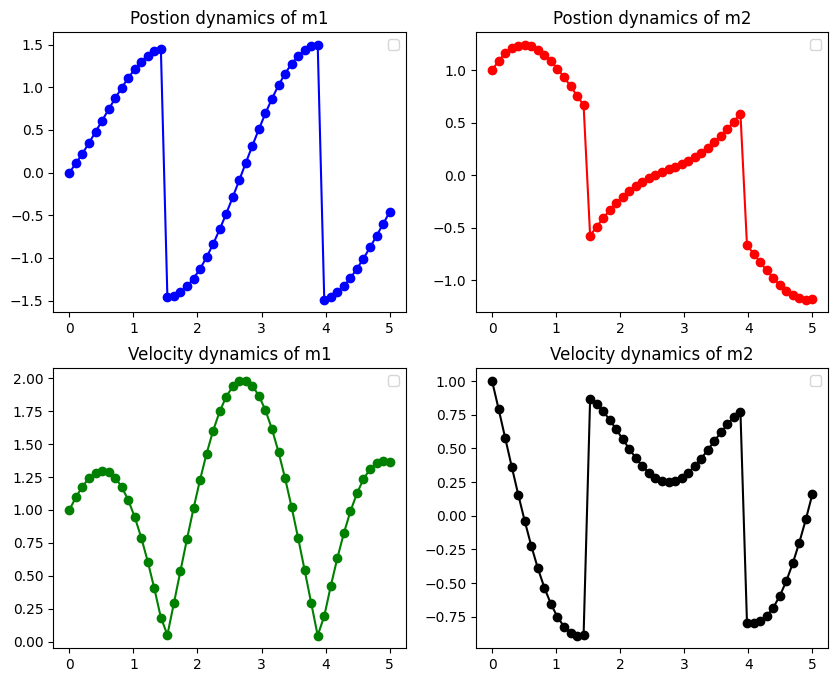

In [19]:
# Execute the Quantum Algorithm with state vector simulation since phase is important


Execution_Prefs = ExecutionPreferences(
    num_shots=1,
    backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ),
)

total_time= 5
steps= 50

# Initialize lists to store the data points
x_vals = []
y1_vals, y2_vals, y3_vals, y4_vals = [], [], [], []

# Synthesizing the quantum program
qprog = synthesize(model)
es = ExecutionSession(qprog, execution_preferences=Execution_Prefs)

# Loop over the time steps
for idx, i in enumerate(np.linspace(0, total_time, steps)):
    result = es.sample({"time": i})
    parsed_state_vector = result.parsed_state_vector
    
    state_amplitudes = sum_amplitudes_by_state(parsed_state_vector, N)
    
    # Normalize the final state
    normalized_final_state = normalize_final_state(state_amplitudes, parsed_state_vector)

    # Simplify the final state by neglecting small terms
    simplified_final_state = simplify_final_state(normalized_final_state)

    # Correct the normalization factor and transform the row vector to column vector
    final_state = norm * simplified_final_state[..., None]
    print("The final quantum state from quantum evolution", final_state)

    # Get the final position and velocity vectors
    final_results = post_process_final_state(final_state, B_padded, N, y_0)
    y_final = final_results["y_final"]
    ydot_final = final_results["ydot_final"]

    # Transform to original coordinates
    x_final_results = back_coordinate_transformation(M, y_final, ydot_final)
    x_final = x_final_results["x_final"]
    xdot_final = x_final_results["xdot_final"]

    print("Positions at t={i}", x_final)
    print("Velocities at t={i}", xdot_final)

    # Append the values to the respective lists
    y1_vals.append(x_final[0, 0])
    y2_vals.append(x_final[1, 0])
    y3_vals.append(xdot_final[0, 0])
    y4_vals.append(xdot_final[1, 0])

    x_vals.append(i)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].set_title("Position dynamics of m1")
axs[0, 1].set_title("Position dynamics of m2")
axs[1, 0].set_title("Velocity dynamics of m1")
axs[1, 1].set_title("Velocity dynamics of m2")

axs[0, 0].plot(x_vals, y1_vals, 'b-o')
axs[0, 1].plot(x_vals, y2_vals, 'r-o')
axs[1, 0].plot(x_vals, y3_vals, 'g-o')
axs[1, 1].plot(x_vals, y4_vals, 'k-o')

# axs[0, 0].legend()
# axs[0, 1].legend()
# axs[1, 0].legend()
# axs[1, 1].legend()

plt.show()
    

# print(x_vals)
# print(y1_vals, y2_vals, y3_vals, y4_vals)


### Classical Numerical Solution:

### Comparision between Classical and Quantum Solutions

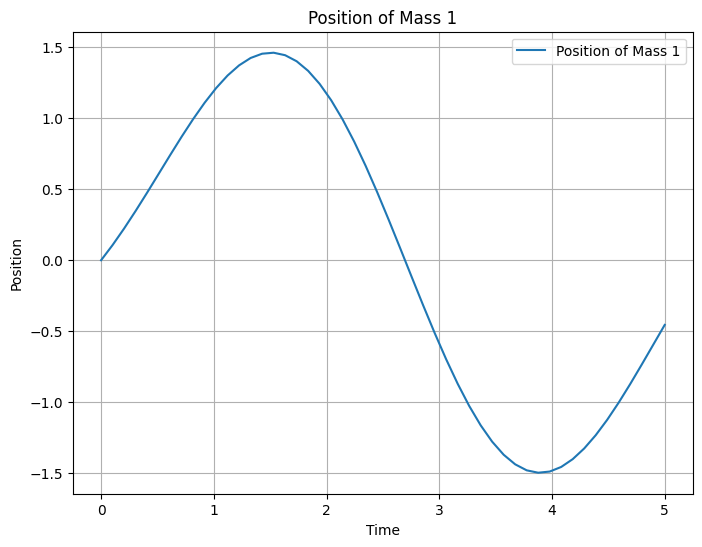

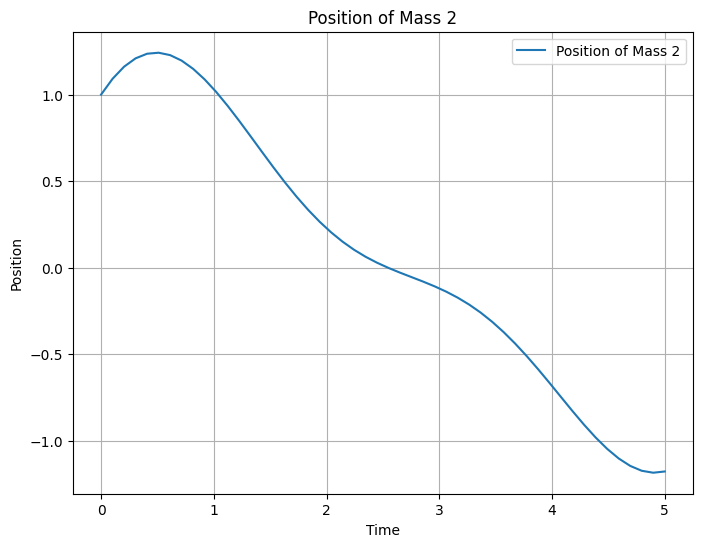

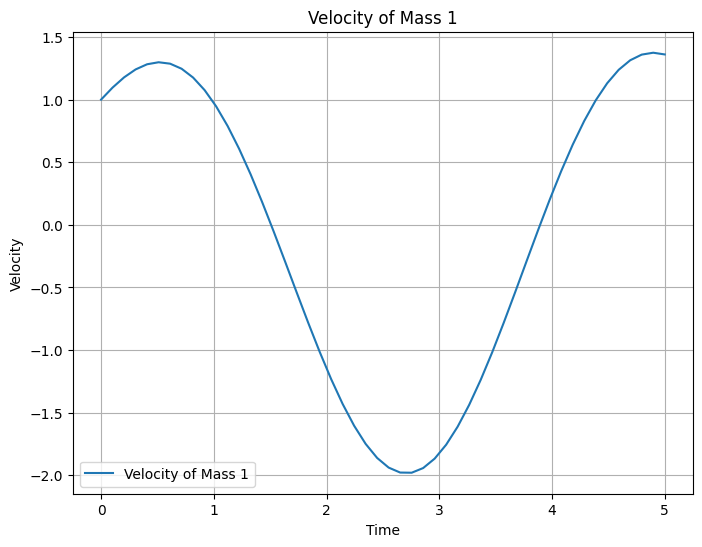

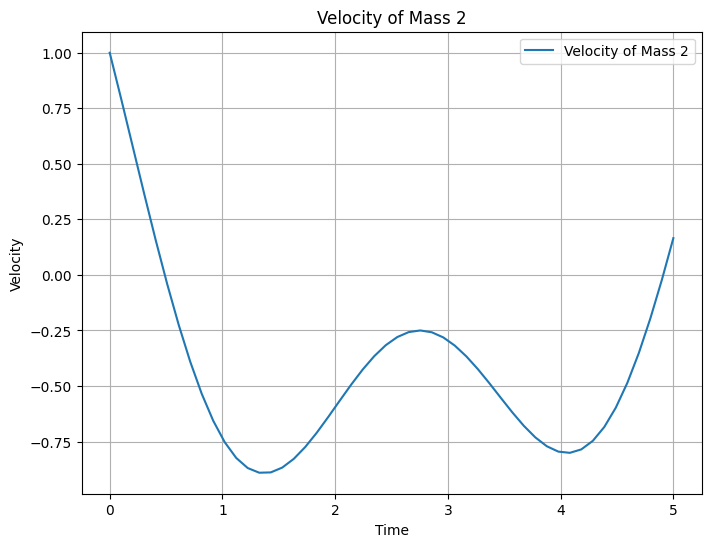

Position Vectors at t=0.5 classically
[-0.45499398 -1.17897589]
Velocity Vectors at t=0.5 classically
[1.36071299 0.1655862 ]
Percentatage error in positions and velocities {'Position of Mass 1': 1.7835787761975708, 'Velocity of Mass 1': 0.011414450142919048, 'Position of Mass 2': 0.15149548783853134, 'Velocity of Mass 2': 4.213848388257149}
{'Position of Mass 1': '+', 'Velocity of Mass 1': '+', 'Position of Mass 2': '+', 'Velocity of Mass 2': '+'}


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def equations_of_motion(t, init, N, M, K):
    """
    Definition:
        EOM for classical coupled oscillator system with N masses
    Args:
        t (array): Time array
        init (list): Initial Conditions
        N (int): Number of masses
        M (array): Mass matrix (diagonal)
        K (array): Spring constant matrix
    Output:
        (list): List of final equations
    """
    x = init[:N]
    v = init[N:]
    dxdt = v
    dvdt = np.zeros(N)
    
    for i in range(N):
        if i == 0:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i+1] * (x[i+1] - x[i])) / M[i, i]
        elif i == N-1:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i-1] * (x[i-1] - x[i])) / M[i, i]
        else:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i-1] * (x[i-1] - x[i]) + K[i, i+1] * (x[i+1] - x[i])) / M[i, i]

    return np.concatenate((dxdt, dvdt))

# Initial conditions: [x1(0), x2(0), ..., xN(0), v1(0), v2(0), ..., vN(0)]
initial_conditions = np.concatenate((x_0, xdot_0))

# Time span for the simulation
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 50)

# Solve the system of differential equations
solution = scipy.integrate.solve_ivp(equations_of_motion, t_span, initial_conditions.flatten(), t_eval=t_eval, args=(N, M, K))

# Extract the results
t = solution.t
x = solution.y[:N, :]
v = solution.y[N:, :]

# Plot position of mass 1
plt.figure(figsize=(8, 6))
plt.plot(t, x[0], label='Position of Mass 1')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position of Mass 1')
plt.grid(True)
plt.legend()
plt.show()

# Plot position of mass 2
plt.figure(figsize=(8, 6))
plt.plot(t, x[1], label='Position of Mass 2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position of Mass 2')
plt.grid(True)
plt.legend()
plt.show()

# Plot velocity of mass 1
plt.figure(figsize=(8, 6))
plt.plot(t, v[0], label='Velocity of Mass 1')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity of Mass 1')
plt.grid(True)
plt.legend()
plt.show()

# Plot velocity of mass 2
plt.figure(figsize=(8, 6))
plt.plot(t, v[1], label='Velocity of Mass 2')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity of Mass 2')
plt.grid(True)
plt.legend()
plt.show()

# Get the results numerically at the final time step
x_classic = np.array([x[0][-1], x[1][-1]])
xdot_classic = np.array([v[0][-1], v[1][-1]])

print("Position Vectors at t=0.5 classically")
print(x_classic)
print("Velocity Vectors at t=0.5 classically")
print(xdot_classic)

# Compare two solutions
comparision = calculate_error(x_final, xdot_final, x_classic, xdot_classic, N)
amplitude_error = comparision["amplitude_error"]
sign_error = comparision["sign_error"]

print("Percentatage error in positions and velocities", amplitude_error)
print(sign_error)

#### **As we see, the results match very well, with very low percentage error, for the simplest possible case.**